# Analyzing house sales in the United States

We have a file with data on house sales in the 'King County' region in the United States. It is composed of the following fields that provide us with information. Among them, we have:

- id --> property ID
- date --> sale date
- price --> property price in US Dollars
- bedrooms --> number of bedrooms
- bathrooms --> number of bathrooms
- sqft_living --> living area square footage
- sqft_lot --> property area square footage
- floors --> number of floors
- yr_built --> year of construction
- yr_renovated --> year of renovation (0 if not renovated since its construction)
- zipcode --> zip code
- lat --> latitude
- long --> longitude
- review --> a review of how happy the buyer is with the house (1 to 5, Not happy to Very happy)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Obtaining the Dataframe
df = pd.read_csv('house_data_prices.csv', sep=",")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,zipcode,lat,long,review
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,1955,0,98178,47.5112,-122.257,1
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,1951,1991,98125,47.7210,-122.319,2
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,1933,0,98028,47.7379,-122.233,4
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,1965,0,98136,47.5208,-122.393,3
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,1987,0,98074,47.6168,-122.045,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,2009,0,98103,47.6993,-122.346,4
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,2014,0,98146,47.5107,-122.362,3
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,2009,0,98144,47.5944,-122.299,1
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,2004,0,98027,47.5345,-122.069,5


### Obtaning some statistical descriptive data
Here we'll use some pandas statistical functions like mean, std, max and min; to obtain some useful information about the dataset.

#### 1.1 Average price

In [4]:
price = df.price
promedio = price.mean()
print('Average house price: ','USD ', promedio.round(2))

Average house price:  USD  540182.16


#### 1.2 Standard Deviation

In [5]:
desv_estandar= price.std()
print("House's Standard deviation: ",'USD ', round(desv_estandar,2))

House's Standard deviation:  USD  367362.23


#### 1.3 Most expensive house price

In [6]:
mas_cara= price.max()
print("Most expensive house: ",'USD ', round(mas_cara,2))

Most expensive house:  USD  7700000.0


#### 1.4 Cheapest house price

In [16]:
mas_barata=price.min()
print("Cheapest house price: ",'USD ', round(mas_barata,2))

Cheapest house price:  USD  75000.0


### Important insight
Here we can realize that there is a huge difference between the most expensive and the cheapest house, and these values are quite far from the average price. This affirmation is supported with the huge standard deviation value that we calculated. So, we'll probably find some outliers, that may affect some of the analysis done later in this project. We're not going to eliminate them, just to see the effects they can have on the following exercises

### 2.  Exploring client purchases' satisfaction

We want to see how satisfied the clients are with their houses. We already have a column with the reviews in a 0-5 discrete numerical scale. To give those numbers relevant context, we're going to associate each review number with a satisfaction degree described below:

1 : Not happy  
2 : Neutral  
3 : Somehow happy  
4 : Happy  
5 : Very happy  

Then, we're going to build a chart to visualize better the satisfaction trends.

In [3]:
""" First, we create a copy of the review column. We could have also created a blank column.
This code adds the new column automatically in the dataframe"""

df["review_label"] = df["review"].copy()

"""Next, we use the loc function (pandas built in function) to add new values to the new colum (review_label),
according to the conditions based on the original review column"""

df.loc[df.review_label == 1, "review_label"] = "Not happy"
df.loc[df.review_label == 2, "review_label"] = "Neutral"
df.loc[df.review_label == 3, "review_label"] = "Somehow happy"
df.loc[df.review_label == 4, "review_label"] = "Happy"
df.loc[df.review_label == 5, "review_label"] = "Very happy"
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,zipcode,lat,long,review,review_label
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,1955,0,98178,47.5112,-122.257,1,Not happy
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,1951,1991,98125,47.7210,-122.319,2,Neutral
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,1933,0,98028,47.7379,-122.233,4,Happy
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,1965,0,98136,47.5208,-122.393,3,Somehow happy
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,1987,0,98074,47.6168,-122.045,2,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,2009,0,98103,47.6993,-122.346,4,Happy
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,2014,0,98146,47.5107,-122.362,3,Somehow happy
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,2009,0,98144,47.5944,-122.299,1,Not happy
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,2004,0,98027,47.5345,-122.069,5,Very happy


#### Now, let's build the chart. For educational purposes, We'll show two ways to build graphs, using matplotlib and seaborn

In [8]:
# First way: Using matplotlib

'''Creating a new dataframe with the count for each label, transforming it to Data Frame object, 
and ordering the values by their ascending review level
This Dataframe will be used to build the bar chart using Matplotlib'''

recuento_satisfaccion = df.groupby("review_label").size().to_frame().T[["Not happy","Neutral","Somehow happy","Happy","Very happy"]]
recuento_satisfaccion

review_label,Not happy,Neutral,Somehow happy,Happy,Very happy
0,2109,4341,7540,5442,2181


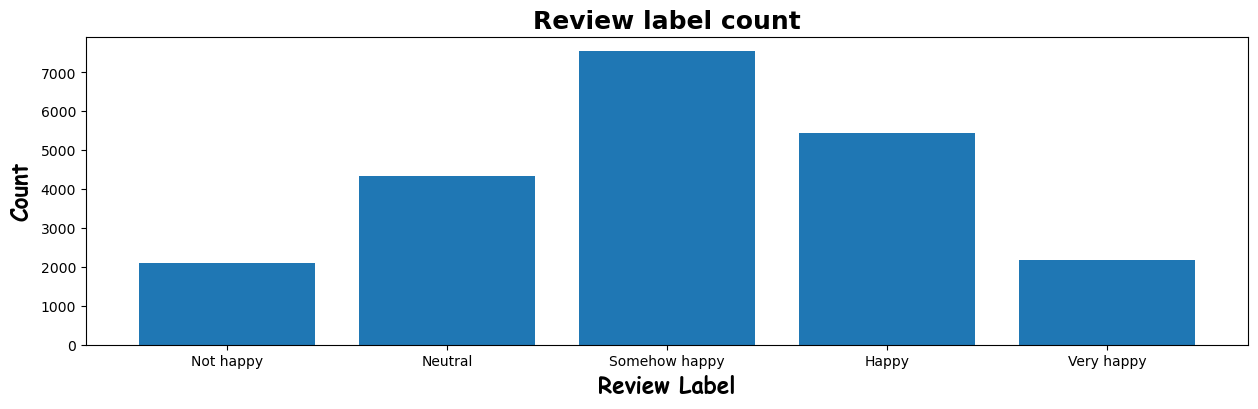

In [9]:
#Using matplotlib functions to build a bar chart with the count for differente labels

fig = plt.figure(figsize = (15,4)) #Building the blank canvas
plt.bar(recuento_satisfaccion.columns,recuento_satisfaccion.values.flatten()) #Building the graph

#Formatting the graph
plt.title('Review label count', fontsize = 18, fontweight = 'semibold') 
plt.xlabel('Review Label', fontsize = 16, fontweight = 'semibold', fontfamily = 'cursive')
plt.ylabel('Count', fontsize = 16, fontweight = 'semibold', fontfamily = 'cursive') 
plt.show()

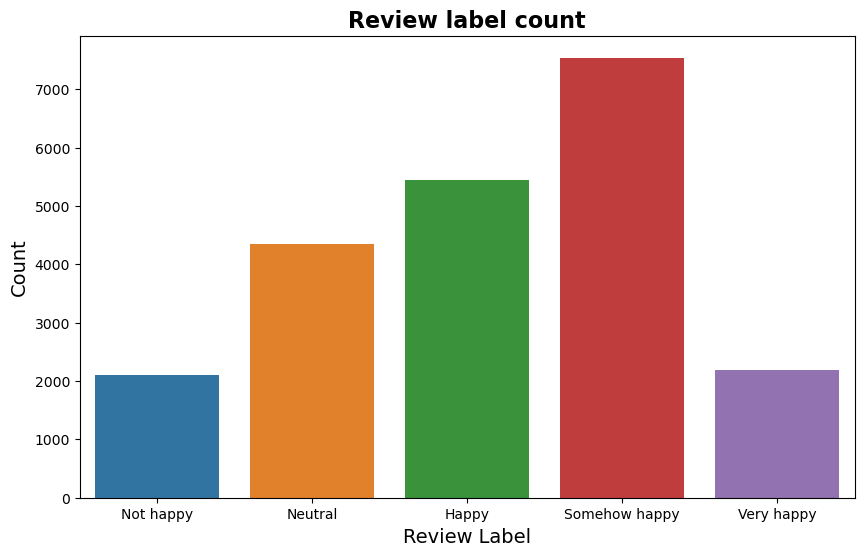

In [10]:
# Second way: with the seaborn function called 'countplot'

fig2 = plt.figure(figsize=(10,6)) 
sns.countplot(data = df, x ='review_label') #Seaborn function. You don't need to create a new dataframe

#Formatting the graph
plt.title('Review label count', fontsize = 16, fontweight = 'semibold') 
plt.xlabel('Review Label', fontsize = 14, fontweight = 'roman')
plt.ylabel('Count', fontsize = 14, fontweight = 'roman') 
plt.xticks(rotation=0)  #Changes the default rotation. Here it is set horizontally
plt.show()

#### Important insight
We can see that there is an important number of people that are not fully satisfied with the house they bought. Indeed, most of them gave a review of 3-4. With this information, the entity in charge can focus on the customers that are 'Somehow happy' and come up with strategies to improve that satisfaction level

### 3 - Diving deeper in the County's information

The County includes the city of Seattle, whose location is found at the following coordinates:
lat: 47.36
long: -122.19

Seattle includes all the houses whose geographic position falls within a radius of +- 0.2 of latitude and longitude with respect to the city's coordinates. Taking this into account, we will analyze some characteristics of the houses based on their location inside or outside of this city. To do this, we will first create a new column with qualitative information about their location in Seattle, and then perform some calculations.

In [4]:
# Creating a blank colum (filled with Nan values)
df['in_seattle'] = np.nan

#Adding values to the column, according to ratio conditions
lat_0, long_0 = 47.36, -122.19
delta = 0.2

df['in_seattle'] = np.where(
    (df['lat'].between(lat_0 - delta, lat_0 + delta)) & 
    (df['long'].between(long_0 - delta, long_0 + delta)),
    'in', 
    'out'
)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,zipcode,lat,long,review,review_label,in_seattle
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,1955,0,98178,47.5112,-122.257,1,Not happy,in
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,1951,1991,98125,47.7210,-122.319,2,Neutral,out
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,1933,0,98028,47.7379,-122.233,4,Happy,out
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,1965,0,98136,47.5208,-122.393,3,Somehow happy,out
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,1987,0,98074,47.6168,-122.045,2,Neutral,out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,2009,0,98103,47.6993,-122.346,4,Happy,out
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,2014,0,98146,47.5107,-122.362,3,Somehow happy,in
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,2009,0,98144,47.5944,-122.299,1,Not happy,out
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,2004,0,98027,47.5345,-122.069,5,Very happy,in


#### 3.2 Average house price in and outside Seattle

In [64]:
df.groupby("in_seattle")["price"].mean().to_frame().round(2)

,price
in_seattle,
in,388859.36
out,649211.19


#### 3.3 - Is there a difference between average surface area in Seattle and out of the city?
Let's find out calculating the difference

In [71]:
media_dentro, media_fuera = df.groupby("in_seattle")["sqft_lot"].mean().values

# For this analysis, we considered the lot surface, instead of living surface.

diferencia = int (media_fuera - media_dentro)
print('Difference between average surface area in a house in Seattle vs. outside: ', diferencia, ' sqft')

Difference between average surface area in a house in Seattle vs. outside:  1016  sqft


In [68]:
# Showing the percentage
general = df.sqft_lot.mean()
print('Percentage difference: ', ((diferencia/general)*100).round(2), '%' )

Percentage difference:  6.73 %


#### 3.4 - Number of houses with more than 3 bedrooms, 2 bathrooms and that cost more than 500K:

In [71]:
# Filtering the dataframe according to the conditions, then counting the number of rows (Number of rows = number of houses that meet the condition)

num_houses, column = df[(df['price'] > 500000.00) & (df['bedrooms'] > 3) & (df['bathrooms'] > 2)].shape
print('Houses with more than 3 bedrooms, 2 bathrooms and that cost more than 500K: ', 
      num_houses, 'houses')

Houses with more than 3 bedrooms, 2 bathrooms and that cost more than 500K:  4326 houses


### 4 - Categorizing houses

4.1 - We are categorizing houses by size into 'small','medium', and 'big'. A house is considered 'small' if it has less than 150 m<sup>2 </sup>, 'medium' if it has between 150 and 300 m<sup>2 </sup>, and 'big' if it has more than 300 m<sup>2 </sup>. Since the surface area in the dataset is in square feet, we assumed a conversion rate of 10.7 ft2 to 1 m<sup>2 </sup>.

Once again, we will be creating a new column with qualitative information to help categorize the houses according to their size.


In [5]:
# Creating the new column called size_label
df["size_label"] = np.nan

# Filling the column with the values according to the condition
df.loc[(df.sqft_lot/10.7) < 150, "size_label"] = "small"
df.loc[(df.sqft_lot/10.7).between(150,300), "size_label"] = "medium"
df.loc[(df.sqft_lot/10.7) > 300, "size_label"] = "big"
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,zipcode,lat,long,review,review_label,in_seattle,size_label
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,1955,0,98178,47.5112,-122.257,1,Not happy,in,big
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,1951,1991,98125,47.7210,-122.319,2,Neutral,out,big
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,1933,0,98028,47.7379,-122.233,4,Happy,out,big
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,1965,0,98136,47.5208,-122.393,3,Somehow happy,out,big
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,1987,0,98074,47.6168,-122.045,2,Neutral,out,big
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,2009,0,98103,47.6993,-122.346,4,Happy,out,small
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,2014,0,98146,47.5107,-122.362,3,Somehow happy,in,big
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,2009,0,98144,47.5944,-122.299,1,Not happy,out,small
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,2004,0,98027,47.5345,-122.069,5,Very happy,in,medium


4.2 - We will observe in a graph how the median property size of each house relates to its location in Seattle and its categorical size.

In [89]:
# Creating and showing the new dataframe that we'll use to build the graph.
comparativa = df.groupby(['in_seattle', 'size_label'])['sqft_lot'].median().to_frame()
comparativa

sqft_lot
in_seattle size_label          
in         big           8100.0
           medium        2505.5
           small         1157.0
out        big           8000.0
           medium        2550.0
           small         1220.0

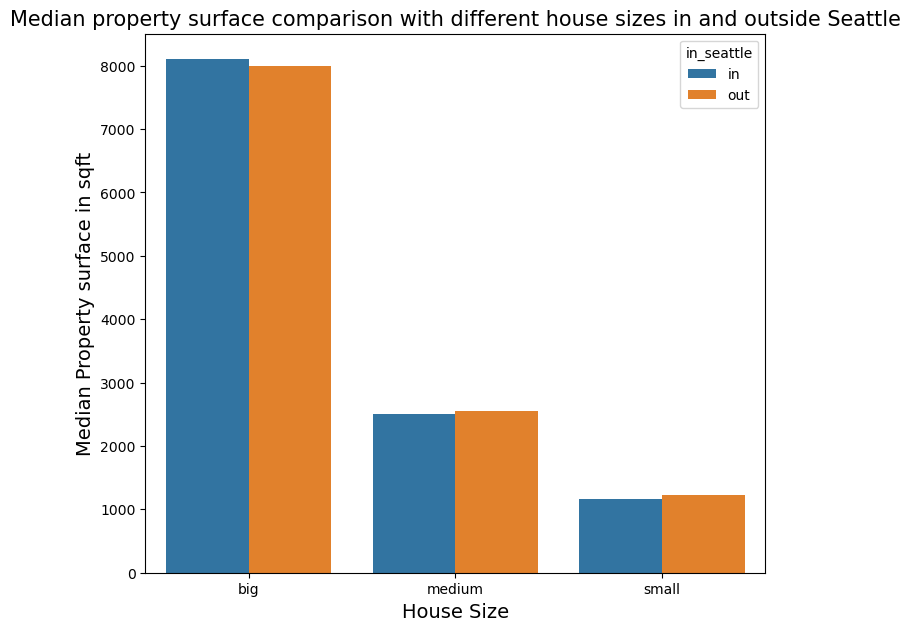

In [93]:
# We need the reseted index version of the dataframe
comparativa = df.groupby(['in_seattle', 'size_label'])['sqft_lot'].median().reset_index()

# Building the graph
fig = plt.figure(figsize=(8, 7))
sns.barplot(x='size_label', y='sqft_lot', hue='in_seattle', data=comparativa)

# Formatting the graph
plt.xlabel('House Size', fontsize = 14, fontweight = 'roman')
plt.ylabel('Median Property surface in sqft', fontsize = 14, fontweight = 'roman')
plt.title('Median property surface comparison with different house sizes in and outside Seattle', fontsize = 15, fontweight = 'roman')
plt.xticks(rotation=0)
plt.show()

4.3 - Now, we will find out where we have more big houses: in or outside Seattle

In [73]:
# Counting the number of houses by size label
casas_size = df.groupby(['in_seattle', 'size_label']).size().to_frame()
casas_size

0
in_seattle size_label       
in         big          8566
           medium        306
           small         179
out        big         10965
           medium        825
           small         772

In [74]:
# Extracting the big houses in Seattle
casas_grandes_dentro = int(casas_size.loc['in','big'])
print('Number of big houses in Seattle: ', casas_grandes_dentro)

Number of big houses in Seattle:  8566


In [75]:
# Extracting the big houses outisde Seattle
casas_grandes_fuera = int(casas_size.loc['out','big'])
print('Number of big houses outside Seattle: ', casas_grandes_fuera)

Number of big houses outside Seattle:  10965


In [76]:
# Calculating total of big houses
total_casas_grandes = casas_grandes_dentro + casas_grandes_fuera
print('Total Number of big houses: ', total_casas_grandes)

Total Number of big houses:  19531


In [77]:
# Showing the percentage of big houses in and ouside Seattle

porcentaje_dentro = round((casas_grandes_dentro / total_casas_grandes)*100,2)
porcentaje_fuera = round((casas_grandes_fuera / total_casas_grandes)*100,2)
print('Percentage of big houses in vs outside Seattle: ', 
      "\n", 'In Seattle: ', porcentaje_dentro, '%',
      "\n", 'Outside Seattle: ', porcentaje_fuera, '%')

Percentage of big houses in vs outside Seattle:  
 In Seattle:  43.86 % 
 Outside Seattle:  56.14 %


4.4 - Next, we want to compare the most expensive and cheapest houses by size label:

In [90]:
'''We need to creat two dataframes with the information of cheap and expensive houses,
then merge the two datasets to build a graph to visualize better the information'''

# Expensive dataframe
caras = df.groupby('size_label')['price'].max().reset_index()
caras['Type'] = 'Expensive'
caras

,size_label,price,Type
0,big,7700000.0,Expensive
1,medium,1850000.0,Expensive
2,small,1230000.0,Expensive


In [79]:
# Cheap dataframe
baratas = df.groupby('size_label')['price'].min().reset_index()
baratas['Type'] = 'Cheap'
baratas

,size_label,price,Type
0,big,75000.0,Cheap
1,medium,90000.0,Cheap
2,small,130000.0,Cheap


In [80]:
# Merging the two datasets

caras_baratas = pd.concat([caras, baratas], axis = 0)
caras_baratas

,size_label,price,Type
0,big,7700000.0,Expensive
1,medium,1850000.0,Expensive
2,small,1230000.0,Expensive
0,big,75000.0,Cheap
1,medium,90000.0,Cheap
2,small,130000.0,Cheap


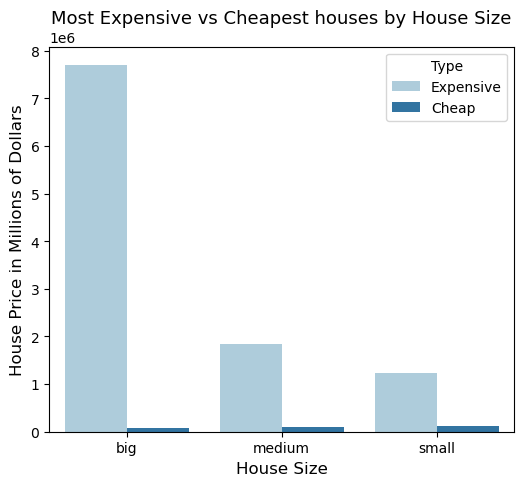

In [81]:
#Building the graph with the two types at the same time

fig = plt.figure(figsize=(6, 5))
sns.barplot(x='size_label', y='price', hue='Type', data= caras_baratas, palette = 'Paired')

plt.xlabel('House Size', fontsize = 12, fontweight = 'roman')
plt.ylabel('House Price in Millions of Dollars', fontsize = 12, fontweight = 'roman')
plt.title('Most Expensive vs Cheapest houses by House Size', fontsize = 13, fontweight = 'roman')
plt.xticks(rotation=0)

plt.show()

#### We notice that we can't appreciate the cheapest houses in this graph
So, we decided to build two separate graphs to observe better the numbers

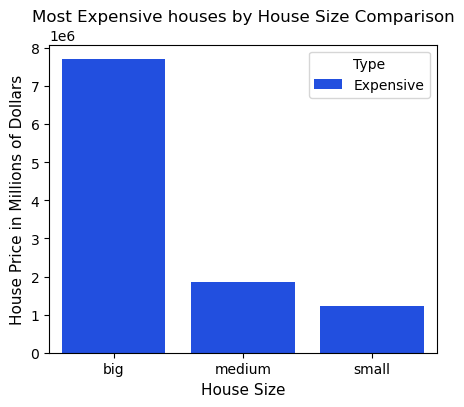

In [82]:
# Most expensive only graph

fig = plt.figure(figsize=(5, 4))
sns.barplot(x='size_label', y='price', hue='Type', data= caras, palette = 'bright')

plt.xlabel('House Size', fontsize = 11, fontweight = 'roman')
plt.ylabel('House Price in Millions of Dollars', fontsize = 11, fontweight = 'roman')
plt.title('Most Expensive houses by House Size Comparison', fontsize = 12, fontweight = 'roman')
plt.xticks(rotation=0)

plt.show()

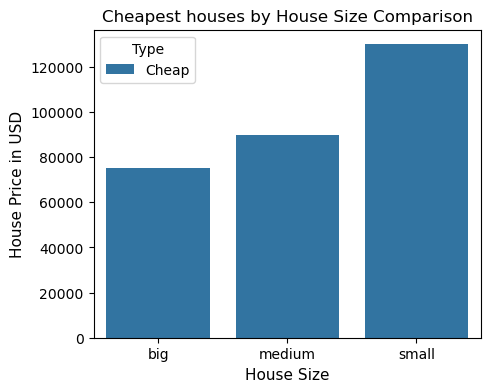

In [92]:
# Cheapest only graph

fig = plt.figure(figsize=(5, 4))
sns.barplot(x='size_label', y='price', hue='Type', data= baratas)

plt.xlabel('House Size', fontsize = 11, fontweight = 'roman')
plt.ylabel('House Price in USD', fontsize = 11, fontweight = 'roman')
plt.title('Cheapest houses by House Size Comparison', fontsize = 12, fontweight = 'roman')
plt.xticks(rotation=0)

plt.show()

#### Important insight
At first glance, it seems a bit suspicious that a small house has a higher price than a large one in this latter graph. However, it is essential to remember the **context of the data**. This graph does not take into account the location of the houses; therefore, a possible explanation for this phenomenon is that houses located within a city tend to be more expensive and smaller, while larger houses are typically found outside the city, which could lower their selling price. Thus, this small house with a price above a large house might be situated in a luxurious location within a city, whereas the large house may be located outside a city, leading to a lower sale price.

4.5 - We want to see if the house size influences on the customer's satisfaction. For that purpose, we'll build a graph comparing reviews and house sizes.

In [68]:
# Dataframe used in this part
review_tamaño = df.groupby(['size_label','review_label'])['review'].mean().to_frame().reset_index()

# We took the average review score for this analysis
review_tamaño

,size_label,review_label,review
0,big,Happy,4.0
1,big,Neutral,2.0
2,big,Not happy,1.0
3,big,Somehow happy,3.0
4,big,Very happy,5.0
5,medium,Happy,4.0
6,medium,Neutral,2.0
7,medium,Not happy,1.0
8,medium,Somehow happy,3.0
9,medium,Very happy,5.0


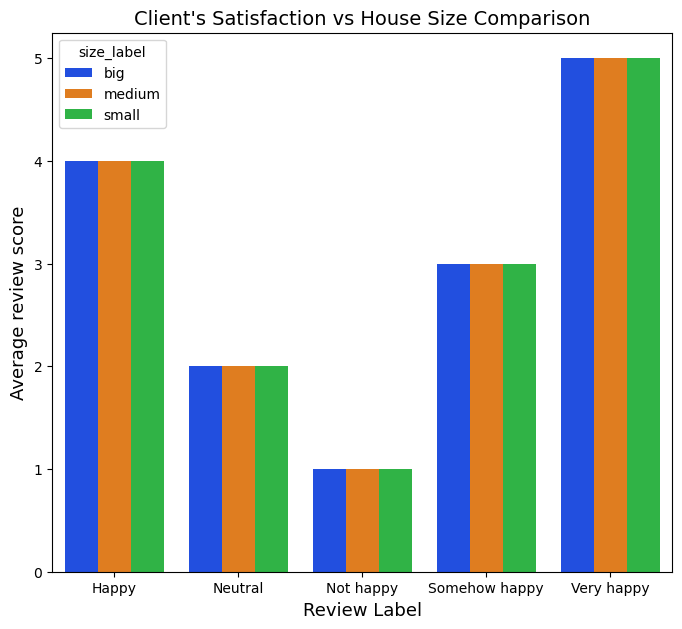

In [70]:
# Building the graph and formatting it

fig = plt.figure(figsize=(8, 7))
sns.barplot(x='review_label', y='review', hue='size_label', data= review_tamaño, palette = 'bright')

plt.xlabel('Review Label',fontsize = 13, fontweight = 'roman')
plt.ylabel('Average review score',fontsize = 13, fontweight = 'roman')
plt.title("Client's Satisfaction vs House Size Comparison",fontsize = 14, fontweight = 'roman')
plt.xticks(rotation=0)

plt.show()

#### Important insight
We can see that there is no difference between client's average review score and house size. For example, for the "Very happy" Review category, there is the same average score for small, medium and big house. In conclusion, there is no relationshitp between house size and client's satisfaction.

### 5 - Adding more detail to our analysis

In order to conduct a more comprehensive analysis by municipality, we have gathered a dataset from the United States National Information Office containing information about zip codes and cities (the filename is zipcode-database.csv). It includes the following information:

- **zipcode** --> zip code of the population
- **City** --> city to which the zip code belongs.

With this information, it should be straightforward to conduct a detailed study of house sales by city.

5.1 - We want to create a visualization that compares the average price per house size in each city. With that information, we'll extract some conclusions

In [84]:
# We decide to build a heat map for this purpose. First, we open our new dataset

df2 = pd.read_csv('zipcode-database.csv', sep=",")
df2

,zipcode,City
0,705,AIBONITO
1,610,ANASCO
2,611,ANGELES
3,612,ARECIBO
4,601,ADJUNTAS
...,...,...
42517,34009,APO
42518,34010,APO
42519,34001,APO
42520,34071,APO


In [85]:
# Extracting only the columns from the original dataset we need for this analysis
df1 = df[['price','zipcode','size_label']]
df1['zipcode'] = df1['zipcode'].astype(int)
df1

C:\Users\thepr\AppData\Local\Temp\ipykernel_16892\1599266730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['zipcode'] = df1['zipcode'].astype(int)


,price,zipcode,size_label
0,221900.0,98178,big
1,538000.0,98125,big
2,180000.0,98028,big
3,604000.0,98136,big
4,510000.0,98074,big
...,...,...,...
21608,360000.0,98103,small
21609,400000.0,98146,big
21610,402101.0,98144,small
21611,400000.0,98027,medium


In [86]:
# Merging the dataset above with the zipcode and city dataframe. Here we use the merge function
df3 = pd.merge(df1, df2, on='zipcode')
df3

,price,zipcode,size_label,City
0,221900.0,98178,big,SEATTLE
1,205425.0,98178,big,SEATTLE
2,445000.0,98178,big,SEATTLE
3,236000.0,98178,big,SEATTLE
4,170000.0,98178,big,SEATTLE
...,...,...,...,...
21608,2720000.0,98039,big,MEDINA
21609,1950000.0,98039,big,MEDINA
21610,2250000.0,98039,big,MEDINA
21611,2900000.0,98039,big,MEDINA


In [87]:
# We want the average price per size label, per city. So, we have to group those values according to the conditions

df3_grouped = ((df3.groupby(['City', 'size_label'])['price'].mean().to_frame())/1000).round(2)
df3_grouped

price
City          size_label         
AUBURN        big          292.81
              medium       221.47
BELLEVUE      big          905.11
              medium       553.02
              small        580.45
BLACK DIAMOND big          423.67
BOTHELL       big          490.87
              medium       443.00
CARNATION     big          456.80
              medium       310.00
DUVALL        big          427.73
              medium       335.43
ENUMCLAW      big          315.71
FALL CITY     big          580.64
FEDERAL WAY   big          290.16
              medium       190.48
              small        189.45
ISSAQUAH      big          651.83
              medium       507.59
              small        387.27
KENMORE       big          468.91
              medium       336.40
              small        238.19
KENT          big          300.13
              medium       240.11
              small        139.50
KIRKLAND      big          650.16
              medium       558.98
              small        450.75
MAPLE VALLEY  big          371.22
              medium       220.34
MEDINA        big         2161.30
MERCER ISLAND big         1194.87
NORTH BEND    big          440.23
              medium       280.00
REDMOND       big          667.90
              medium       452.36
              small        416.43
RENTON        big          406.34
              medium       283.85
              small        265.32
SAMMAMISH     big          732.17
              medium       836.20
SEATTLE       big          548.60
              medium       515.07
              small        441.41
SNOQUALMIE    big          531.73
              medium       403.51
VASHON        big          487.48
WOODINVILLE   big          619.75
              medium       407.14

In [93]:
'''The Dataset can be visualized better in a wide way (more columns that rows),
so the heatmap will look wider (more columns than rows) instead of longer (more rows than columns)
If graphed in a long way, it is difficult to see all the cities at a glance'''

# Transposing the dataframe using cities as the columns
df3_grouped.unstack(1).T

City              AUBURN  BELLEVUE  BLACK DIAMOND  BOTHELL  CARNATION  DUVALL  \
      size_label                                                                
price big         292.81    905.11         423.67   490.87      456.8  427.73   
      medium      221.47    553.02            NaN   443.00      310.0  335.43   
      small          NaN    580.45            NaN      NaN        NaN     NaN   

City              ENUMCLAW  FALL CITY  FEDERAL WAY  ISSAQUAH  ...  MEDINA  \
      size_label                                              ...           
price big           315.71     580.64       290.16    651.83  ...  2161.3   
      medium           NaN        NaN       190.48    507.59  ...     NaN   
      small            NaN        NaN       189.45    387.27  ...     NaN   

City              MERCER ISLAND  NORTH BEND  REDMOND  RENTON  SAMMAMISH  \
      size_label                                                          
price big               1194.87      440.23   667.90  406.34     732.17   
      medium                NaN      280.00   452.36  283.85     836.20   
      small                 NaN         NaN   416.43  265.32        NaN   

City              SEATTLE  SNOQUALMIE  VASHON  WOODINVILLE  
      size_label                                            
price big          548.60      531.73  487.48       619.75  
      medium       515.07      403.51     NaN       407.14  
      small        441.41         NaN     NaN          NaN  

[3 rows x 24 columns]

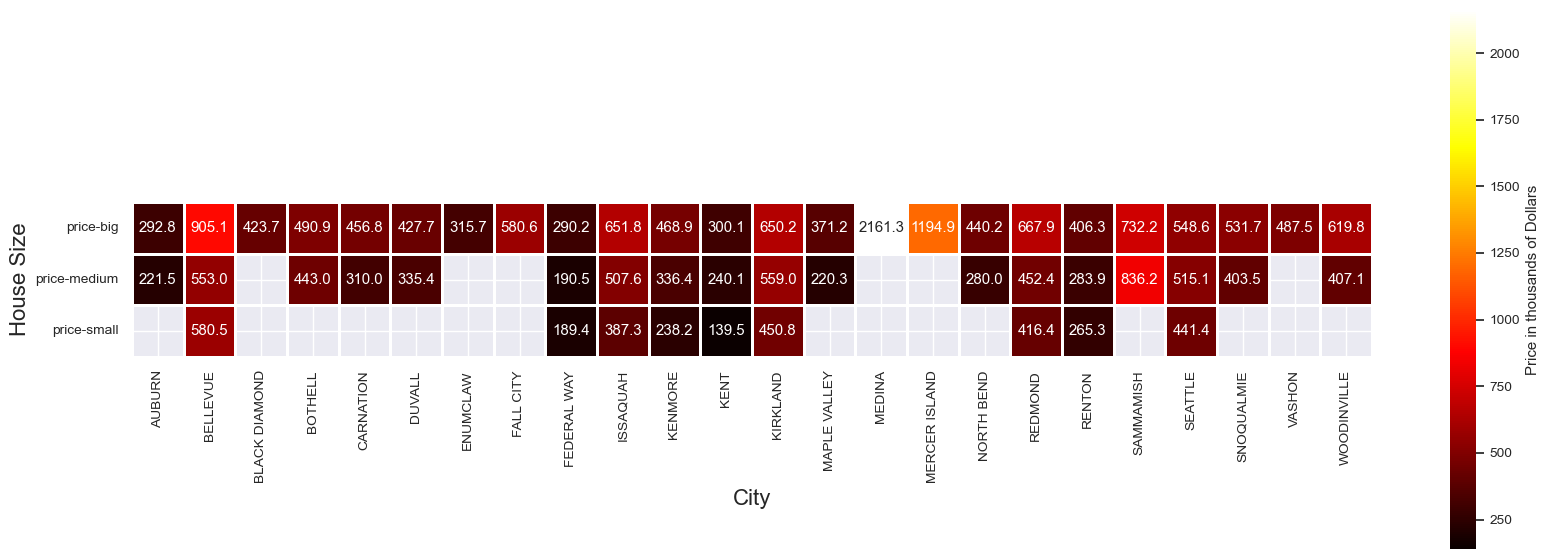

In [101]:
# Builing the graph and formatting it

fig = plt.figure(figsize=(20, 7))

sns.heatmap(df3_grouped.unstack(1).T, annot=True, fmt=".1f", 
            linewidths=1, square = True, cmap='hot', cbar= True, 
            cbar_kws={'label': 'Price in thousands of Dollars'})

sns.set(font_scale=0.9)
plt.xlabel('City', fontsize = 16)
plt.ylabel('House Size', fontsize = 16)
plt.show()

#### Insights
- According to the graph, the most expensive houses are in Medina and Mercer Islan. The chapest houses are in Kent and  Federal Way
- There are some NaN values in the dataframe, wich means for that particular city, there are not any small, or medium houses to compare. That would be due to missing information; or simply that those cities have only bing houses, indicating that they are luxury places to live.

5.2 - We want to study if there is a correlation between House price, living area and location (having Seattle as a reference point). For this purpose, we'll see the trends first in a graph.
- We're interested in seeing only the 100 most expensive houses by living area and location (in or outside Seattle)

In [103]:
# For that, we only need the information regarding living area, price and Location relative to Seattle  
df4 = df[['price', 'sqft_living', 'in_seattle']]
df4_dentro = df4[df4['in_seattle'] == 'in']
df4_fuera = df4[df4['in_seattle'] == 'out']

In [105]:
# Sorting the prices in descending order (The most expensive will go first)
df_ordered_in = df4_dentro.sort_values(by='price', ascending=False)

# Filtering the top 100 INSIDE Seattle
df_ordered_in_100 = df_ordered_in.iloc[:100]
df_ordered_in_100

,price,sqft_living,in_seattle
8092,4670000.0,9640,in
7989,3400000.0,5230,in
12872,3100000.0,6980,in
20325,3000000.0,4410,in
10373,2980000.0,7400,in
...,...,...,...
792,1360000.0,3550,in
18266,1360000.0,4960,in
13770,1350000.0,5370,in
3708,1350000.0,5230,in


In [106]:
# We do the same for the houses outide Seattle
df_ordered_out = df4_fuera.sort_values(by='price', ascending=False)
df_ordered_out_100 = df_ordered_out.iloc[:100]
df_ordered_out_100

,price,sqft_living,in_seattle
7252,7700000.0,12050,out
3914,7060000.0,10040,out
9254,6890000.0,9890,out
4411,5570000.0,9200,out
1448,5350000.0,8000,out
...,...,...,...
18226,2480000.0,4340,out
5702,2470000.0,6390,out
17899,2460000.0,6500,out
1031,2450000.0,4250,out


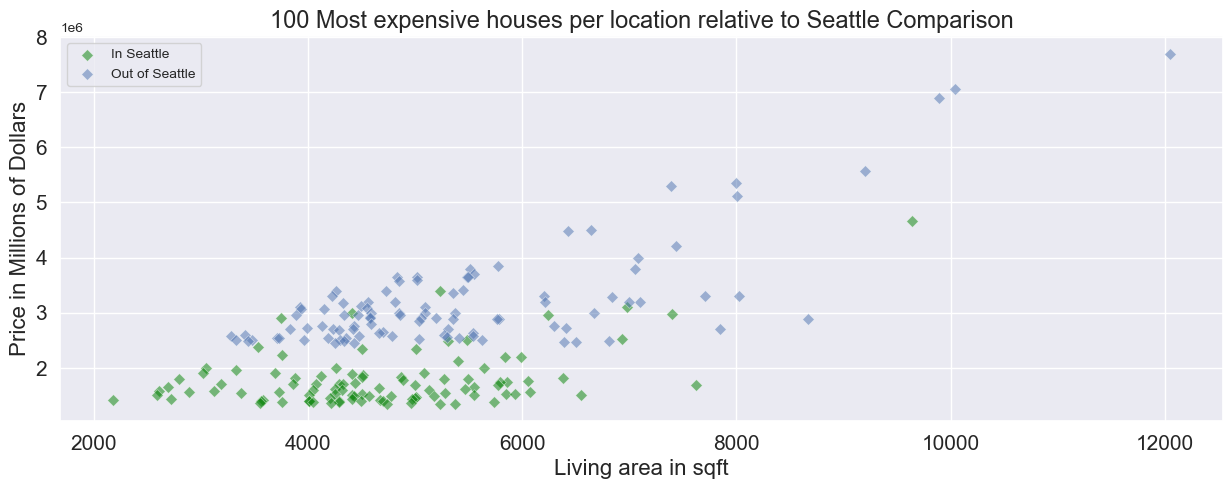

In [107]:
""" A Scatterplot chart is an excellent option to see the trends we want to study.
We'll plot in the same chart the 100 most expensive houses per living area per location relative to Seattle"""


# Building the graph
fig = plt.figure(figsize = (15, 5))
sns.scatterplot(data = df_ordered_in_100, x = 'sqft_living', y = 'price', marker = 'D', label = 'In Seattle', alpha = 0.5, color = 'green')
sns.scatterplot(data = df_ordered_out_100, x = 'sqft_living', y = 'price', marker = 'D', label = 'Out of Seattle', alpha = 0.5)
plt.xlabel('Living area in sqft', fontsize=16, fontweight = 'roman')
plt.ylabel('Price in Millions of Dollars', fontsize = 16, fontweight = 'roman')
plt.xticks(fontsize=15)
plt.yticks(fontsize = 15)
plt.title('100 Most expensive houses per location relative to Seattle Comparison', fontsize = 17, fontweight = 'roman')
plt.show()

#### Important insight
Visually, we can see that there is some correlation between house size, location and price. Houses outside Seattle tend to be more expensive than those inside; and the bigger the house, the more expensive and the farther they are from Seattle.

5.3 - Finally, we want to statistically confirm what we observed in the last graph. For this purpose, we'll perform a statistic hypothesis test, using a function from scipy.stats library
- Is the price of the 100 most expensive properties in and outside of Seattle significantly different?

##### We want to determine our two hypothesis and test them:

- H<sub>0 </sub> = There is no significant difference between prices in and outside Seattle (There is no correlation between price and location relative to Seattle)
- H<sub>1 </sub> = There IS a significant difference between prices in and outside Seattle (There IS a correlation between price and location relative to Seattle)

In [109]:
from scipy.stats import ttest_ind

In [110]:
# Performing the Test:
ttest_ind(df_ordered_in_100['price'] , df_ordered_out_100['price'], equal_var = False)

Ttest_indResult(statistic=-13.01485320298266, pvalue=1.5521882989372096e-26)

**As our p value is less than 0.05, we can confidently reject H<sub>0 </sub> and accept H<sub>1 </sub>**

In conclusion, there **is** a significant difference between prices in and outside Seattle. We now confirmed statistically what we found in the last graph.